# Practice: Anomaly Detection with LOF

In the second lab we showed how to use the LOF algorithm with prostate cancer data.
We call this Outlier Detection Using Local Outlier Factor (LOF)

Local outlier factor (LOF) is a proximity-based outlier detection model in Aggarwal's classification scheme.  

The basic procedure is to:

- For each point, compute the density of its local neighborhood.
- Compute local outlier factor (LOF) of a sample p as the average of the ratios of the density of sample p and the density of its nearest neighbors.
- Outliers are points with largest LOF value.

The below wiki page goes into more detail on how this method works. 

**Reference:** 
- [Wiki](https://en.wikipedia.org/wiki/Local_outlier_factor)

In this practice, we want you to apply LOF to statewide crime data. The dataset is found at:
`/dsa/data/all_datasets/mini_project/us_statewide_crime.csv`

For future reference, it is good to know you can check out the file beforehand to make sure the separating character is what you'd expect and whether it has headers or not like this in a terminal, from your home directory on your server:

```
[sebcq5@metal ~]$ head /dsa/data/all_datasets/mini_project/us_statewide_crime.csv
State,violent crime rate,murder rate,poverty,high school,college,single parent,unemployed,metropolitan
Alabama,486,7.4,14.7,77.5,20.4,26,4.6,70.2
Alaska,567,4.3,8.4,90.4,28.1,23.2,6.6,41.6
Arizona,532,7,13.5,85.1,24.6,23.5,3.9,87.9
Arkansas,445,6.3,15.8,81.7,18.4,24.7,4.4,49
California,622,6.1,14,81.2,27.5,21.8,4.9,96.7
Colorado,334,3.1,8.5,89.7,34.6,20.8,2.7,84
Connecticut,325,2.9,7.7,88.2,31.6,22.9,2.3,95.6
Delaware,684,3.2,9.9,86.1,24,25.6,4,81.4
District of Columbia,1508,41.8,17.4,83.2,38.3,44.7,5.8,10
```

**Activity 1**: First we'll load the Data Mining with R (DMwR) library and read in the dataset into a dataframe named `crime`.

In [1]:
library(DMwR)
crime <- read.table("/dsa/data/all_datasets/mini_project/us_statewide_crime.csv",sep=',',header=TRUE)


Loading required package: lattice
Loading required package: grid


**Activity 2**: Examine the dataset to get a sense of what we're working with.  Look at the top rows of the file, check out the number of rows and columns, and summarize the data's distribution.

Note: Unfortunately, the provenance of this dataset has been lost or misplaced. We also do not know the dates this data covers. This is less than ideal, but will do for a practice.

In [2]:
### Write code that shows the top rows of the file you read in. 

# ----------------------------------
head(crime)


State,violent.crime.rate,murder.rate,poverty,high.school,college,single.parent,unemployed,metropolitan
Alabama,486,7.4,14.7,77.5,20.4,26.0,4.6,70.2
Alaska,567,4.3,8.4,90.4,28.1,23.2,6.6,41.6
Arizona,532,7.0,13.5,85.1,24.6,23.5,3.9,87.9
Arkansas,445,6.3,15.8,81.7,18.4,24.7,4.4,49.0
California,622,6.1,14.0,81.2,27.5,21.8,4.9,96.7
Colorado,334,3.1,8.5,89.7,34.6,20.8,2.7,84.0


In [3]:
# Write code that gives you an idea how many rows and columns the dataset has

# ----------------------------------
dim(crime)

[1] 51  9

In [4]:
## Write code that summarizes the crime data's distribution

summary(crime)

        State    violent.crime.rate  murder.rate        poverty     
 Alabama   : 1   Min.   :  81.0     Min.   : 0.600   Min.   : 7.30  
 Alaska    : 1   1st Qu.: 281.5     1st Qu.: 2.700   1st Qu.: 9.45  
 Arizona   : 1   Median : 384.0     Median : 4.800   Median :10.60  
 Arkansas  : 1   Mean   : 441.6     Mean   : 5.333   Mean   :11.56  
 California: 1   3rd Qu.: 549.5     3rd Qu.: 6.400   3rd Qu.:13.45  
 Colorado  : 1   Max.   :1508.0     Max.   :41.800   Max.   :19.30  
 (Other)   :45                                                      
  high.school       college      single.parent     unemployed   
 Min.   :77.10   Min.   :15.30   Min.   :13.60   Min.   :2.200  
 1st Qu.:82.55   1st Qu.:22.55   1st Qu.:21.10   1st Qu.:3.250  
 Median :86.10   Median :24.60   Median :22.80   Median :3.900  
 Mean   :85.44   Mean   :25.19   Mean   :23.40   Mean   :3.941  
 3rd Qu.:88.15   3rd Qu.:27.80   3rd Qu.:24.65   3rd Qu.:4.500  
 Max.   :91.80   Max.   :38.30   Max.   :44.70   Max.   :6

We will be using LOF to identify and plot outliers, but our data includes the State column which is non-numeric. Even though it is non-numeric, we don't want to lose this important semantic information. So we will extract the State into a new dataframe named state and then remove it from the crime dataframe.

**Activity 3**: Extract the State column into a new dataframe named `state` and then remove the State column from the crime dataframe. Be sure to check your work by looking at a few rows from each dataframe.


In [5]:
# create the state dataframe from the State column of crime
# Your answer here:
# ----------------------------------
state <- crime[,1]



#remove the State column from the crime dataframe
# Your answer here:
# ----------------------------------
crime <- crime[,-1]


In [6]:
# is state what you expect?
# Your answer here (code to determine):
# ----------------------------------
head(state)



[1] Alabama    Alaska     Arizona    Arkansas   California Colorado  
51 Levels: Alabama Alaska Arizona Arkansas California Colorado ... Wyoming

In [7]:
# is crime what you expect?
# Your answer here (code to determine):
# ----------------------------------
head(crime)

violent.crime.rate,murder.rate,poverty,high.school,college,single.parent,unemployed,metropolitan
486,7.4,14.7,77.5,20.4,26.0,4.6,70.2
567,4.3,8.4,90.4,28.1,23.2,6.6,41.6
532,7.0,13.5,85.1,24.6,23.5,3.9,87.9
445,6.3,15.8,81.7,18.4,24.7,4.4,49.0
622,6.1,14.0,81.2,27.5,21.8,4.9,96.7
334,3.1,8.5,89.7,34.6,20.8,2.7,84.0


Next, we will use LOF to identify and plot outliers. For the first plot, we would like you to use a density plot of the outlier scores. We don't think we've exposed you to density plots before. They are similar to histograms, but for continuous data and using a smoothing technique. For more details, see:

- [Density Plot](https://datavizcatalogue.com/methods/density_plot.html)
- [Kernel Desnity Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)

Here are some references for you to figure out how to do a density plot in R:
- [plot.density](https://www.rdocumentation.org/packages/stats/versions/3.4.3/topics/plot.density)
Note it says that the input parameter `x` should be a density object
- [density](https://www.rdocumentation.org/packages/stats/versions/3.4.3/topics/density)
Notice the specifications for the return value say "If give.Rkern is true, the number $R(K)$, otherwise an object with class "density" whose underlying structure is a list...

We recommend you use `k=9` for your LOF parameter for number of neighbors.  
Your result should look like this:
<img src="../images/density_plot.png" alt="example density plot" style="width: 400px;"/>
**Activity 4**: Use LOF to identify outliers, and use a density plot of the outlier scores to visualize outliers.


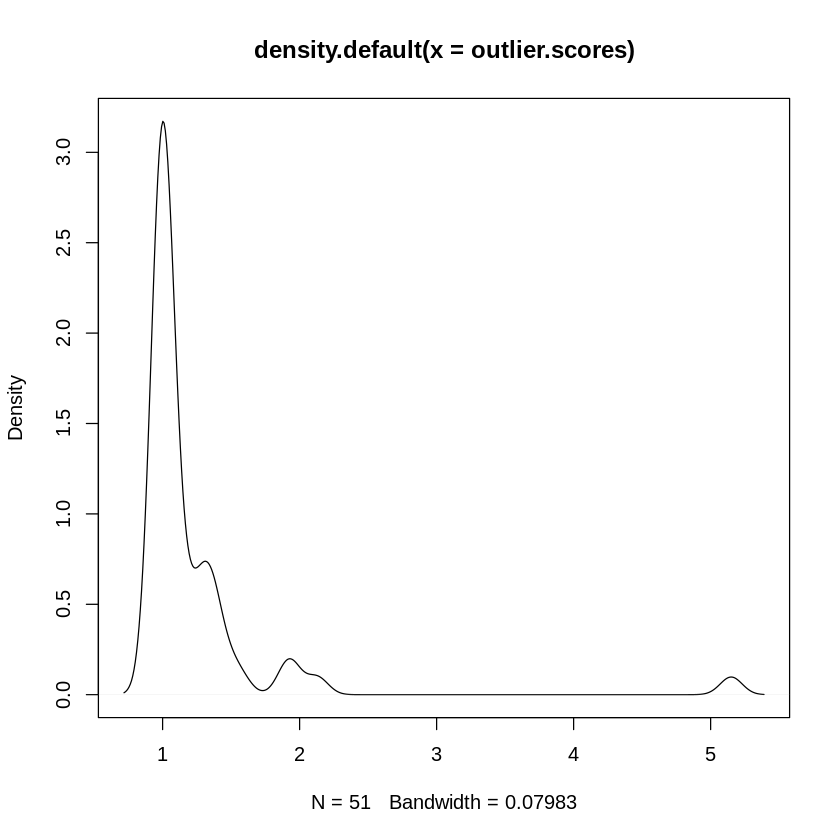

In [8]:
## Write code to first identify and then plot outliers using a density plot of outlier scores
# Your answer here:
# ----------------------------------
outlier.scores <- lofactor(crime,k=9)

plot(density(outlier.scores))


**Activity 5**: List the indexes and the outlier scores of the first five outliers

In [9]:
## Write code to List the indexes of the five points with the highest outlier scores
# Your answer here:
# ----------------------------------
outliers <- order(outlier.scores,decreasing = T)[1:5]
outliers

[1]  9 35 20 46 42

In [10]:
## Use the indexes calculated above to print the outlier scores for those five points
# Your answer here:
# ----------------------------------
outlier.scores[outliers]


[1] 5.150011 2.126913 1.932924 1.916023 1.564146

**Activity 6**: Identify the above five points in a biplot of the first two principal components.

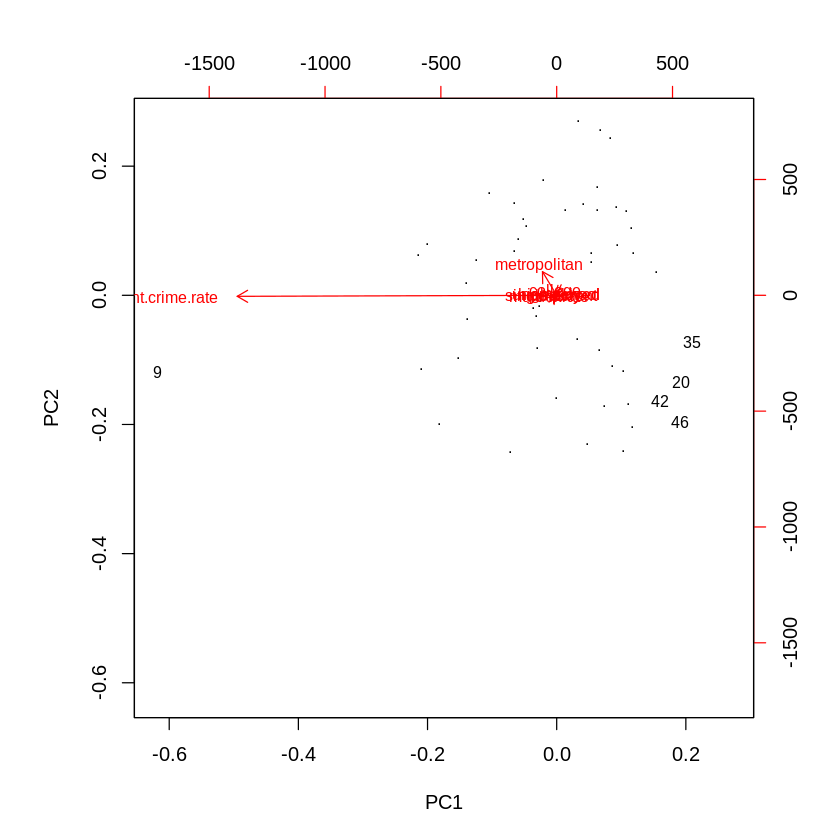

In [11]:
## Write code that identifies the outliers in a plot
# Your answer here:
# ----------------------------------
n<-nrow(crime)
labels <- 1:n
labels[-outliers] <- "."
biplot(prcomp(crime),cex=.8,xlabs=labels)


Next we would like to visualize the relationship between outliers and the various factors included in the crime data. 
A correlation matrix plot (also called a pairs plot) showing the bivariate relationship between each pair of parameters in the dataset is a good way to do this, 
while highlighting the outliers with a different symbol and color.

- [Pairs plot](https://www.rdocumentation.org/packages/graphics/versions/3.4.3/topics/pairs)

You will want to set the graphical parameters for pch and col

- [Graphical parameters](https://www.rdocumentation.org/packages/graphics/versions/3.4.3/topics/par)

We also want two different symbols and colors in the vectors pch and col, varying by index on whether it is a normal point or an outlier. We can do this by creating a vector of the default symbol of the same length as the dataframe (which you probably calculated in activity 6) and then replacing it with the outlier character for the indexes of the outliers. The rep function can create the vector for us.

- [rep function](https://www.rdocumentation.org/packages/base/versions/3.4.3/topics/rep)

Your resultant matrix of plots should look like this:

<img src="../images/pairs_plot.png" alt="example pairs plot" style="width: 600px;"/>

**Activity 8**: Write code to visualize the relationship between outliers and the various factors included in the crime data. 

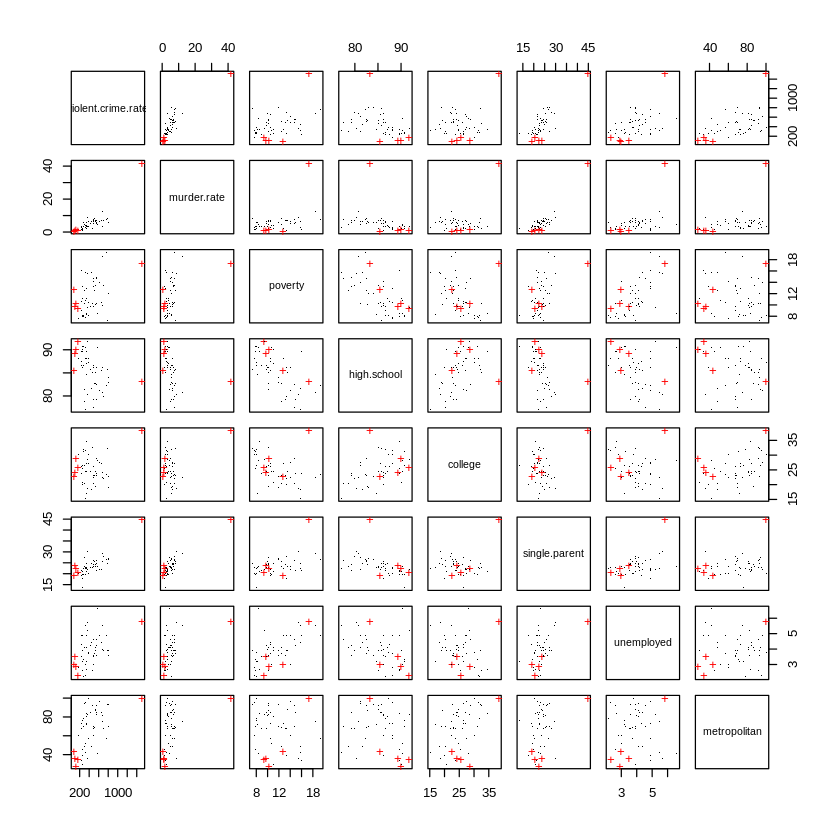

In [18]:
## Write code to visualize the relationship between outliers and various factors included 
## in the crime data using a pairs plot.
# Your answer here:
# ----------------------------------

pch <- rep(".", n)
pch[outliers] <- "+"

col <- rep("black", n)
col[outliers] <- "red"

pairs(crime, pch=pch, col=col)


**Activity 9**: Add the state column back into the crime data set, and list the outliers.

In [21]:
# Add the state column back into the crime data set, and list the outliers.
# Your answer here:
# ----------------------------------
crime$state = state
crime[outliers,]

,violent.crime.rate,murder.rate,poverty,high.school,college,single.parent,unemployed,metropolitan,state
9,1508,41.8,17.4,83.2,38.3,44.7,5.8,100.0,District of Columbia
35,81,0.6,12.8,85.5,22.6,19.1,3.0,43.4,North Dakota
20,110,1.2,9.8,89.3,24.1,23.7,3.5,36.3,Maine
46,114,1.5,10.3,90.0,28.8,22.5,2.9,27.9,Vermont
42,167,0.9,9.4,91.8,25.7,20.7,2.3,34.5,South Dakota


In [22]:
head(crime)

violent.crime.rate,murder.rate,poverty,high.school,college,single.parent,unemployed,metropolitan,state
486,7.4,14.7,77.5,20.4,26.0,4.6,70.2,Alabama
567,4.3,8.4,90.4,28.1,23.2,6.6,41.6,Alaska
532,7.0,13.5,85.1,24.6,23.5,3.9,87.9,Arizona
445,6.3,15.8,81.7,18.4,24.7,4.4,49.0,Arkansas
622,6.1,14.0,81.2,27.5,21.8,4.9,96.7,California
334,3.1,8.5,89.7,34.6,20.8,2.7,84.0,Colorado


**Activity 10**: Look over the various plots and the above listing of the outliers and describe what you can glean about the outliers.

**Activity 11**: What research might you conduct using internet resources to explain these crime outliers? What question(s) might you pursue?

# Save your notebook, then `File > Close and Halt`